In [2]:
# Import pandas – that's all you need for now
import matplotlib.pyplot as plt
import pandas as pd
import os

# Check pandas version
print(f"Pandas version: {pd.__version__}")

# Define the path to your main data file
data_path = "/Users/apple/projects/thesis_revival_project/data/raw/trajectories-0750am-0805am.csv"

# Load the data
print("Loading data...")
df1 = pd.read_csv(data_path)
df2 = pd.read_csv("/Users/apple/projects/thesis_revival_project/data/raw/trajectories-0805am-0820am.csv")
df3 = pd.read_csv("/Users/apple/projects/thesis_revival_project/data/raw/trajectories-0820am-0835am.csv")

# Print basic info
print("Data loaded successfully!")
print(f"Shape: {df1.shape}")  # (rows, columns)
print("\nFirst 5 rows:")
print(df1.head())
print("\nColumn names:")
print(df1.columns.tolist())


Pandas version: 2.3.3
Loading data...
Data loaded successfully!
Shape: (1048575, 18)

First 5 rows:
   Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X  Local_Y  \
0           2        13           437  1118846980200   16.467   35.381   
1           2        14           437  1118846980300   16.447   39.381   
2           2        15           437  1118846980400   16.426   43.381   
3           2        16           437  1118846980500   16.405   47.380   
4           2        17           437  1118846980600   16.385   51.381   

      Global_X     Global_Y  v_Length  v_Width  v_Class  v_Vel  v_Acc  \
0  6451137.641  1873344.962      14.5      4.9        2   40.0    0.0   
1  6451140.329  1873342.000      14.5      4.9        2   40.0    0.0   
2  6451143.018  1873339.038      14.5      4.9        2   40.0    0.0   
3  6451145.706  1873336.077      14.5      4.9        2   40.0    0.0   
4  6451148.395  1873333.115      14.5      4.9        2   40.0    0.0   

   Lane_ID  Prec

In [3]:
combined_trajectory = pd.concat([df1, df2, df3], ignore_index=True)
print(f"\n Combined Shape: {combined_trajectory.shape}") 
print(combined_trajectory.head())
print(combined_trajectory.tail())

combined_trajectory.to_csv("/Users/apple/projects/thesis_revival_project/data/processed/combined_trajectories_0750am_0835am.csv", index=False)



 Combined Shape: (3145725, 18)
   Vehicle_ID  Frame_ID  Total_Frames    Global_Time  Local_X  Local_Y  \
0           2        13           437  1118846980200   16.467   35.381   
1           2        14           437  1118846980300   16.447   39.381   
2           2        15           437  1118846980400   16.426   43.381   
3           2        16           437  1118846980500   16.405   47.380   
4           2        17           437  1118846980600   16.385   51.381   

      Global_X     Global_Y  v_Length  v_Width  v_Class  v_Vel  v_Acc  \
0  6451137.641  1873344.962      14.5      4.9        2   40.0    0.0   
1  6451140.329  1873342.000      14.5      4.9        2   40.0    0.0   
2  6451143.018  1873339.038      14.5      4.9        2   40.0    0.0   
3  6451145.706  1873336.077      14.5      4.9        2   40.0    0.0   
4  6451148.395  1873333.115      14.5      4.9        2   40.0    0.0   

   Lane_ID  Preceeding  Following  Space_Hdwy  Time_Hdwy  
0        2           0   

In [4]:
# 1. Select only the columns we need for this analysis
#    (Adjust column names based on what you saw in df.columns)
lane_speed_df = combined_trajectory[['Lane_ID', 'v_Vel']].copy()

# 2. Handle missing data (a must-do)
lane_speed_df.dropna(inplace=True)

# 3. Calculate average speed per lane
average_speed_per_lane = lane_speed_df.groupby('Lane_ID')['v_Vel'].mean()

# 4. Print the result
print("Average Speed per Lane (ft/s):")
print(average_speed_per_lane)

# 5. Convert to a simple DataFrame and save it
output_table = average_speed_per_lane.reset_index()
output_table.columns = ['Lane_ID', 'Average_Velocity_ft_per_s']
output_table.to_csv('/Users/apple/projects/thesis_revival_project/outputs/avg_speed_per_lane.csv', index=False)
print("\nResults saved to outputs/ folder!")

Average Speed per Lane (ft/s):
Lane_ID
1    28.313301
2    30.630648
3    31.063807
4    31.317537
5    33.841548
6    49.583147
7    44.793859
8    57.168062
Name: v_Vel, dtype: float64

Results saved to outputs/ folder!


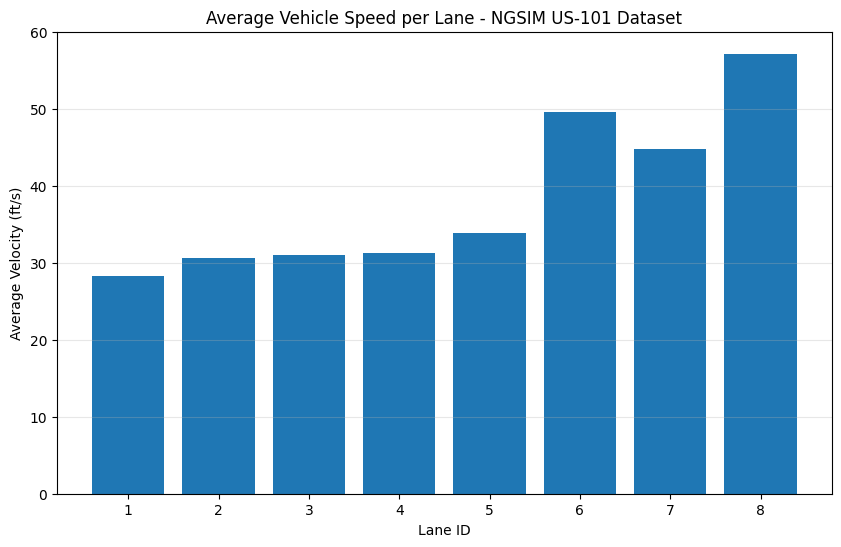

In [5]:


# Create a simple bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_speed_per_lane.index, average_speed_per_lane.values)
plt.xlabel('Lane ID')
plt.ylabel('Average Velocity (ft/s)')
plt.title('Average Vehicle Speed per Lane - NGSIM US-101 Dataset')
plt.grid(axis='y', alpha=0.3)

# Save the chart
plt.savefig('/Users/apple/projects/thesis_revival_project/outputs/avg_speed_per_lane.png', dpi=300, bbox_inches='tight')
plt.show()


Processing df2 for average speed per lane...


Average Speed per Lane (ft/s):
Lane_ID
1    27.644176
2    29.108174
3    28.589656
4    30.082243
5    32.782357
6    50.354079
7    43.577905
8    57.823406
Name: v_Vel, dtype: float64

Results saved to outputs/ folder!


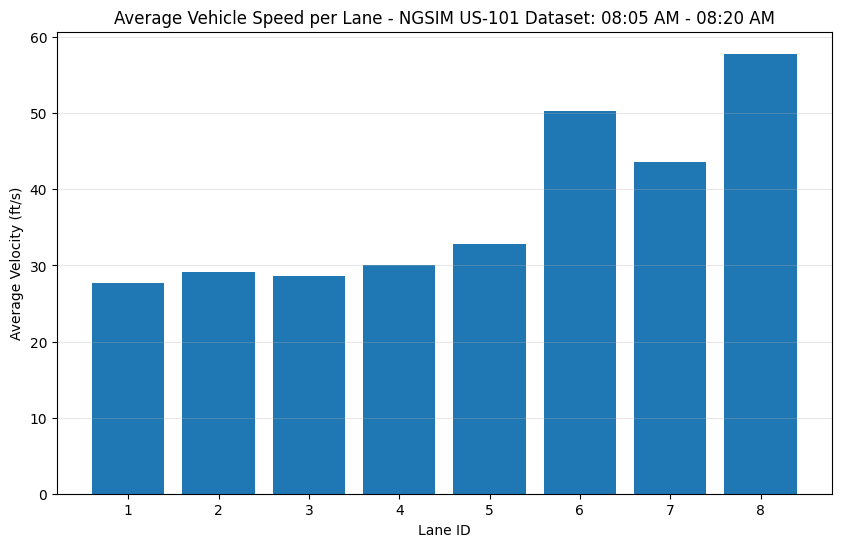

In [6]:
# Process df2 for average speed per lane
print("\nProcessing df2 for average speed per lane...")

lane_speed_df2 = df2[['Lane_ID', 'v_Vel']].copy()

lane_speed_df2.dropna(inplace=True)

df2_average_speed_per_lane = lane_speed_df2.groupby('Lane_ID')['v_Vel'].mean()

print("Average Speed per Lane (ft/s):")
print(df2_average_speed_per_lane)


df2_output_table = df2_average_speed_per_lane.reset_index()
df2_output_table.columns = ['Lane_ID', 'Average_Velocity_ft_per_s']
df2_output_table.to_csv('/Users/apple/projects/thesis_revival_project/outputs/df2_avg_speed_per_lane.csv', index=False)
print("\nResults saved to outputs/ folder!")

# Create a simple bar chart
plt.figure(figsize=(10, 6))
plt.bar(df2_average_speed_per_lane.index, df2_average_speed_per_lane.values)
plt.xlabel('Lane ID')
plt.ylabel('Average Velocity (ft/s)')
plt.title('Average Vehicle Speed per Lane - NGSIM US-101 Dataset: 08:05 AM - 08:20 AM')
plt.grid(axis='y', alpha=0.3)

# Save the chart
plt.savefig('/Users/apple/projects/thesis_revival_project/outputs/df2_avg_speed_per_lane.png', dpi=300, bbox_inches='tight')
plt.show()


Average Speed per Lane (mph):
Lane_ID
1    18.848297
2    19.846477
3    19.492942
4    20.510615
5    22.351601
6    34.332318
7    29.712200
8    39.425039
Name: v_Vel, dtype: float64

Processing df2 for average speed per lane...


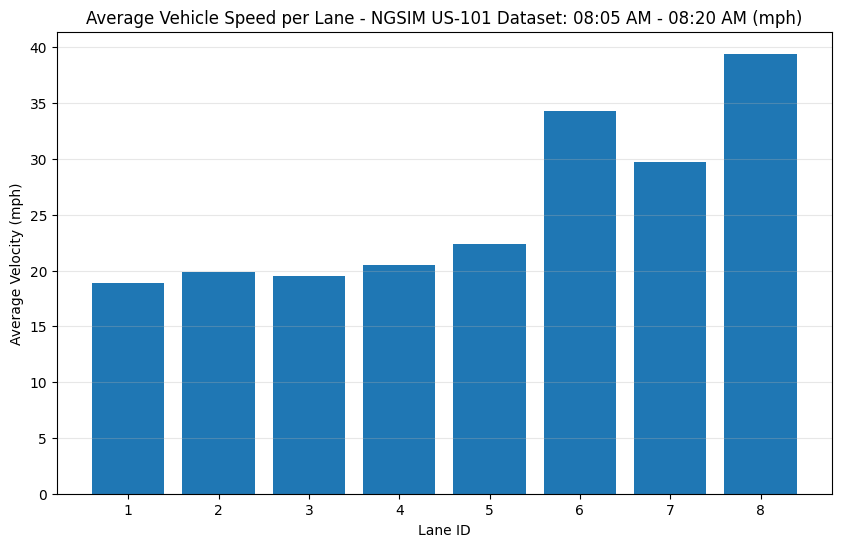

In [7]:
# Convert df2_average_speed_per_lane from ft/s to mph
df2_average_speed_per_lane_mph = df2_average_speed_per_lane * 0.681818  # 1 ft/s = 0.681818 mph
print("\nAverage Speed per Lane (mph):")
print(df2_average_speed_per_lane_mph)
print("\nProcessing df2 for average speed per lane...")
lane_speed_df2 = df2[['Lane_ID', 'v_Vel']].copy()

# Create a simple bar chart for df2_average_speed_per_lane_mph
plt.figure(figsize=(10, 6))
plt.bar(df2_average_speed_per_lane_mph.index, df2_average_speed_per_lane_mph.values)
plt.xlabel('Lane ID')
plt.ylabel('Average Velocity (mph)')
plt.title('Average Vehicle Speed per Lane - NGSIM US-101 Dataset: 08:05 AM - 08:20 AM (mph)')
plt.grid(axis='y', alpha=0.3)